In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
title_basics_df = pd.read_csv('data/imdb.title.basics.csv')
name_basics_df = pd.read_csv('data/imdb.name.basics.csv')
crew_df = pd.read_csv('data/imdb.title.crew.csv')
principal_df = pd.read_csv('data/imdb.title.principals.csv')
ratings_df = pd.read_csv('data/imdb.title.ratings.csv')
Mojo_df = pd.read_csv('data/bom.movie_gross.csv')
tnum_df = pd.read_csv('data/tn.movie_budgets.csv')

In [92]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [93]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [94]:
crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [95]:
principal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [96]:
imdb_df = title_basics_df.merge(ratings_df, on='tconst')
imdb_df = imdb_df.merge(crew_df, on='tconst')

Leaving out principals_df, as it introduces a lot of duplicate entries, if we need it later we can look at it, but for right now I don't think it has anything immediately necessary in it.

In [97]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   directors        73104 non-null  object 
 9   writers          63295 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.2+ MB


6.332728552859619
6.5
1.4749783548957056


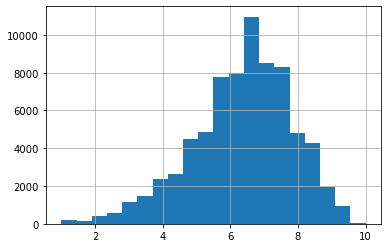

In [98]:
imdb_df['averagerating'].hist(bins=20)
print(imdb_df['averagerating'].mean())
print(imdb_df['averagerating'].median())
print(imdb_df['averagerating'].std())

In [99]:
Mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [100]:
imdb_and_mojo_df = imdb_df.merge(Mojo_df, left_on='primary_title', right_on='title')

In [101]:
imdb_and_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   directors        3023 non-null   object 
 9   writers          2908 non-null   object 
 10  title            3027 non-null   object 
 11  studio           3024 non-null   object 
 12  domestic_gross   3005 non-null   float64
 13  foreign_gross    1832 non-null   object 
 14  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 378.4+ KB


In [102]:
imdb_and_mojo_df['runtime_minutes'].median()
imdb_and_mojo_df['runtime_minutes'] = imdb_and_mojo_df['runtime_minutes'].fillna(imdb_and_mojo_df['runtime_minutes'].median())

700100000.0
66716286.42339958
100.0
2000000.0
30640331.54076539


<AxesSubplot:>

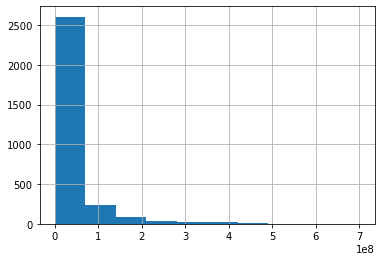

In [103]:
print(imdb_and_mojo_df['domestic_gross'].max())
print(imdb_and_mojo_df['domestic_gross'].std())
print(imdb_and_mojo_df['domestic_gross'].min()) 
print(imdb_and_mojo_df['domestic_gross'].median()) # Median and mean are fairly different thanks to very high outliers.
print(imdb_and_mojo_df['domestic_gross'].mean()) 
imdb_and_mojo_df['domestic_gross'].hist() # This would indicate it's better to replace NaN with median

In [104]:
imdb_and_mojo_df['domestic_gross'] = imdb_and_mojo_df['domestic_gross'].fillna(imdb_and_mojo_df['domestic_gross'].median())
imdb_and_mojo_df['foreign_gross'].replace(',','', regex=True, inplace=True)
imdb_and_mojo_df['foreign_gross'] = pd.to_numeric(imdb_and_mojo_df['foreign_gross'], errors='ignore')

66517835.80895825


<AxesSubplot:>

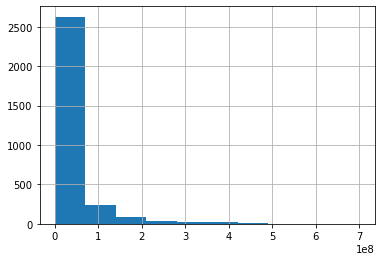

In [105]:
print(imdb_and_mojo_df['domestic_gross'].std())
imdb_and_mojo_df['domestic_gross'].hist()

In [106]:

director_df = imdb_and_mojo_df.groupby('directors').mean().reset_index()
print(director_df.head())
print(name_basics_df.head())

   directors   start_year  runtime_minutes  averagerating       numvotes  \
0  nm0000095  2013.142857        99.285714       6.714286  112297.285714   
1  nm0000108  2014.000000       119.333333       6.666667  184237.333333   
2  nm0000110  2012.500000       110.000000       6.600000  399088.500000   
3  nm0000123  2014.000000       108.000000       6.266667  118783.000000   
4  nm0000127  2010.500000       109.000000       5.500000   68580.000000   

   domestic_gross  foreign_gross         year  
0      18000000.0   4.634286e+07  2013.142857  
1      56085000.0   1.749333e+08  2014.333333  
2     115800000.0   1.766000e+08  2012.500000  
3      41600000.0   5.600000e+07  2014.000000  
4      26450000.0   3.260000e+07  2010.500000  
      nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       

In [107]:
directors_box_df = director_df.merge(name_basics_df, left_on='directors', right_on='nconst')

In [108]:
# directors_box_df.info()
directors_box_df.loc[directors_box_df['death_year'].isna()].drop(columns=["death_year", "birth_year"])

,directors,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,nconst,primary_name,primary_profession,known_for_titles
0,nm0000095,2013.142857,99.285714,6.714286,112297.285714,18000000.0,4.634286e+07,2013.142857,nm0000095,Woody Allen,"writer,director,actor","tt0091167,tt0079522,tt0075686,tt0097123"
1,nm0000108,2014.000000,119.333333,6.666667,184237.333333,56085000.0,1.749333e+08,2014.333333,nm0000108,Luc Besson,"writer,producer,director","tt2872732,tt0119116,tt0110413,tt0100263"
2,nm0000110,2012.500000,110.000000,6.600000,399088.500000,115800000.0,1.766000e+08,2012.500000,nm0000110,Kenneth Branagh,"actor,producer,director","tt0107616,tt0097499,tt3402236,tt0116477"
3,nm0000123,2014.000000,108.000000,6.266667,118783.000000,41600000.0,5.600000e+07,2014.000000,nm0000123,George Clooney,"actor,producer,director","tt2177771,tt1193138,tt1124035,tt0465538"
5,nm0000128,2014.000000,111.000000,7.100000,66595.000000,4200000.0,3.400000e+07,2015.000000,nm0000128,Russell Crowe,"actor,soundtrack,producer","tt0268978,tt1707386,tt0119488,tt0172495"
...,...,...,...,...,...,...,...,...,...,...,...,...
2003,nm9156702,2012.000000,65.000000,6.000000,6.000000,31400000.0,2.850000e+07,2018.000000,nm9156702,Fernando Pacheco,"director,writer","tt2408090,tt7140390,tt7165054"
2004,nm9179246,2017.000000,119.000000,6.900000,6232.000000,690000.0,NaN,2017.000000,nm9179246,R.S. Prasanna,"director,writer","tt3381754,tt6971752"
2005,nm9631956,2018.000000,120.000000,7.400000,54.000000,1300000.0,9.300000e+06,2013.000000,nm9631956,Gagan Puri,director,NaN
2006,nm9659009,2018.000000,108.000000,5.900000,384.000000,94500.0,1.060000e+07,2018.000000,nm9659009,Dong-Seok Noh,"director,writer","tt9894012,tt6485776"


In [109]:
directors_box_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2007
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   directors           2008 non-null   object 
 1   start_year          2008 non-null   float64
 2   runtime_minutes     2008 non-null   float64
 3   averagerating       2008 non-null   float64
 4   numvotes            2008 non-null   float64
 5   domestic_gross      2008 non-null   float64
 6   foreign_gross       1188 non-null   float64
 7   year                2008 non-null   float64
 8   nconst              2008 non-null   object 
 9   primary_name        2008 non-null   object 
 10  birth_year          1209 non-null   float64
 11  death_year          27 non-null     float64
 12  primary_profession  2008 non-null   object 
 13  known_for_titles    2005 non-null   object 
dtypes: float64(9), object(5)
memory usage: 235.3+ KB
